# **Exploring Neural Network Architectures and Autoencoders for MNIST Classification**

Designing the Softmax Classifier for MNIST dataset.

In [ ]:
#importing Tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the MNIST dataset and performing Normalizaiton.
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
# reshaping the data to be adaptable.
x_train=x_train.reshape((-1,784))
x_test=x_test.reshape((-1,784))

In [ ]:
# writing a call back function to plot the weights visualization at epoch 20 and 200
class PrintWeightsAtEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 19 or epoch== 199:
            for layer in self.model.layers:
              layer=model.layers[1]
              weights = layer.get_weights()[0]

              for i in range(weights.shape[1]):
                weight_vector = weights[:, i]
                weight_matrix = weight_vector.reshape((28, 28))

                plt.subplot(2, 5, i + 1)
                plt.imshow(weight_matrix, cmap='viridis',)
                plt.axis('off')
            plt.suptitle(f"Weights Visualization on the epoch:{epoch+1}")
            plt.show()


Designing and Training softmax MNIST Classifier. The network does not have any hidden layers. It just has a input and a softmax layer (output).

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6486 - loss: 1.3750 - val_accuracy: 0.8606 - val_loss: 0.6084
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8567 - loss: 0.5949 - val_accuracy: 0.8810 - val_loss: 0.4811
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8733 - loss: 0.4957 - val_accuracy: 0.8902 - val_loss: 0.4294
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8835 - loss: 0.4439 - val_accuracy: 0.8950 - val_loss: 0.4004
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8895 - loss: 0.4150 - val_accuracy: 0.8985 - val_loss: 0.3812
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8888 - loss: 0.4097 - val_accuracy: 0.9024 - val_loss: 0.3675
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8987 - loss: 0.3779 - val_accuracy: 0.9051 - val_loss: 0.3565
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8984 - loss: 0.3733 - val_accu

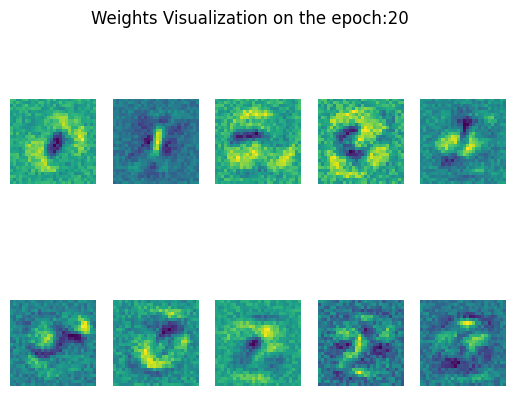

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9107 - loss: 0.3196 - val_accuracy: 0.9158 - val_loss: 0.3059
Epoch 21/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9130 - loss: 0.3098 - val_accuracy: 0.9159 - val_loss: 0.3047
Epoch 22/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9099 - loss: 0.3209 - val_accuracy: 0.9166 - val_loss: 0.3038
Epoch 23/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9140 - loss: 0.3155 - val_accuracy: 0.9161 - val_loss: 0.3015
Epoch 24/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9121 - loss: 0.3127 - val_accuracy: 0.9170 - val_loss: 0.2999
Epoch 25/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9147 - loss: 0.3079 - val_accuracy: 0.9168 - val_loss: 0.2988
Epoch 26/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9140 - loss: 0.3096 - val_accuracy: 0.9164 - val_loss: 0.2979
Epoch 27/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9146 - loss: 0.3104 - val_accuracy:

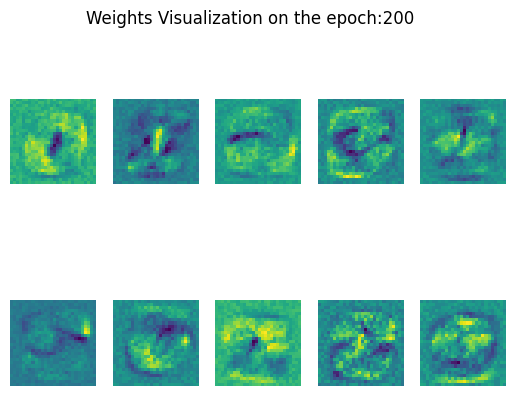

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9295 - loss: 0.2568 - val_accuracy: 0.9254 - val_loss: 0.2670


In [ ]:
input_size=x_train.shape[1]
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(input_size,)),
    tf.keras.layers.Dense(10,activation='softmax')
])
sgd=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
trained_model=model.fit(x_train,y_train,epochs=200,batch_size=64,validation_data=(x_test,y_test),callbacks=[PrintWeightsAtEpoch()])


Plotting test Accuracy Graph.

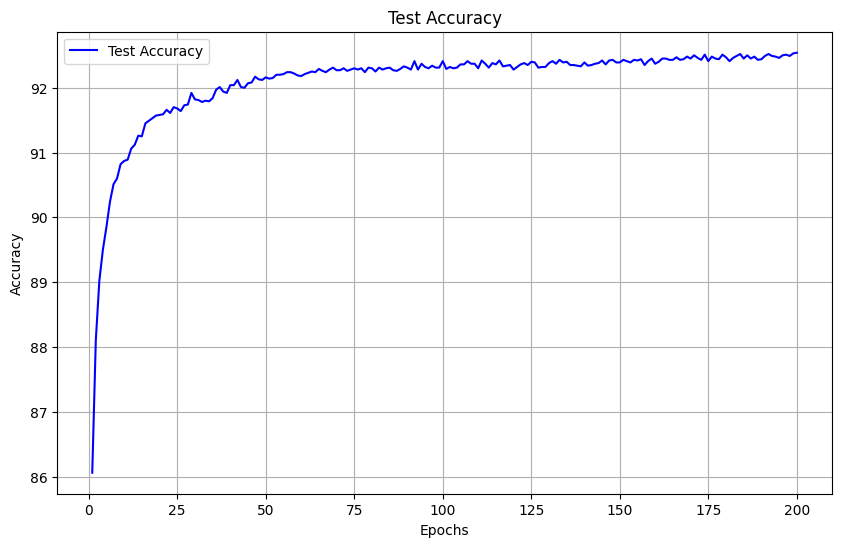

In [ ]:
model_dict = trained_model.history
test_accuracy = [accuracy * 100 for accuracy in model_dict['val_accuracy']]
eps = range(1, len(test_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(eps, test_accuracy, 'b', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Desiging Navie and saprse Auto encoder

Desinging and training the Navie Auto Encoder.

In [ ]:
#creating a Naive Auto encoder.
input_img=tf.keras.layers.Input(shape=(784,))
NV_encoder=tf.keras.layers.Dense(100,activation='sigmoid')(input_img)
NV_decoder=tf.keras.layers.Dense(784,activation='sigmoid')(NV_encoder)
NV_autoencoder=tf.keras.models.Model(input_img,NV_decoder)
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
NV_autoencoder.compile(optimizer=sgd,loss='mean_squared_error')
NV_autoencoder.fit(x_train,x_train,epochs=1000,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2054 - val_loss: 0.1318
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1173 - val_loss: 0.0898
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0860 - val_loss: 0.0785
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0771 - val_loss: 0.0744
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0737 - val_loss: 0.0724
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0721 - val_loss: 0.0713
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0709 - val_loss: 0.0706
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0704 - val_loss: 0.0701
Epoch 9/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0698 - val_loss: 0.0697
Epoch 10/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0695 - val_loss: 0.0694
Epoch 11/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0693 - val_loss: 0.0692
Epoch 12/1000
938/938 ━━━━━━━━

Writing Functions to plot weights, reconstructions and Activation maps.

In [ ]:
# creating plots
def plotting_weights(weights):
    plt.figure(figsize=(10, 6))
    for i in range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(weights[i])
      plt.axis('off')
    plt.show()
def plot_images(images):
    plt.figure(figsize=(10, 6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape((28, 28)))
        plt.axis('off')
    plt.show()
def plot_activations(encoded_train_images,encoded_test_images):
  encoded_features = np.vstack((encoded_train_images, encoded_test_images))
  cmap = plt.get_cmap("viridis")
  fig, ax = plt.subplots(figsize=(10, 6))
  heatmap = ax.imshow(encoded_features, cmap=cmap, aspect="auto")
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 150)
  cbar = plt.colorbar(heatmap, ax=ax)
  cbar.set_label("Activation Value")
  plt.xlabel("Hidden Units")
  plt.ylabel("Samples")
  plt.title("Hidden Unit Activations")
  plt.show()


visualizing the weight of Naive Autoenocder.

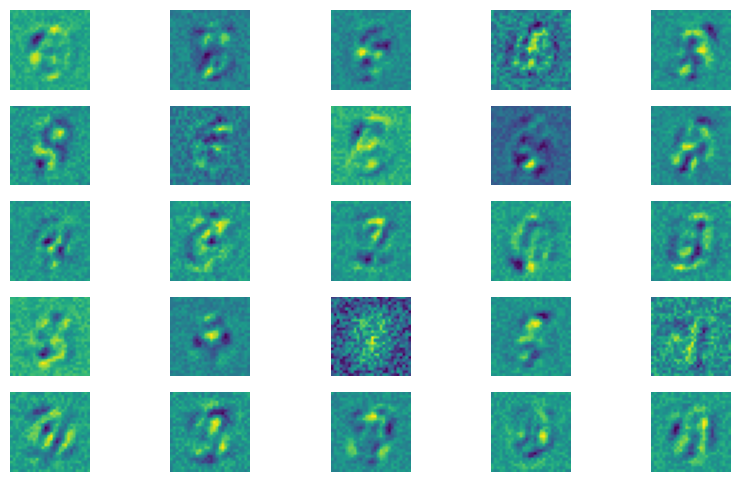

In [ ]:
nv_weights=NV_autoencoder.layers[1].get_weights()[0]
nv_r_weights=nv_weights.T.reshape((100,28,28))
plotting_weights(nv_r_weights)

plotting the reconstructions obtained from Navie Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


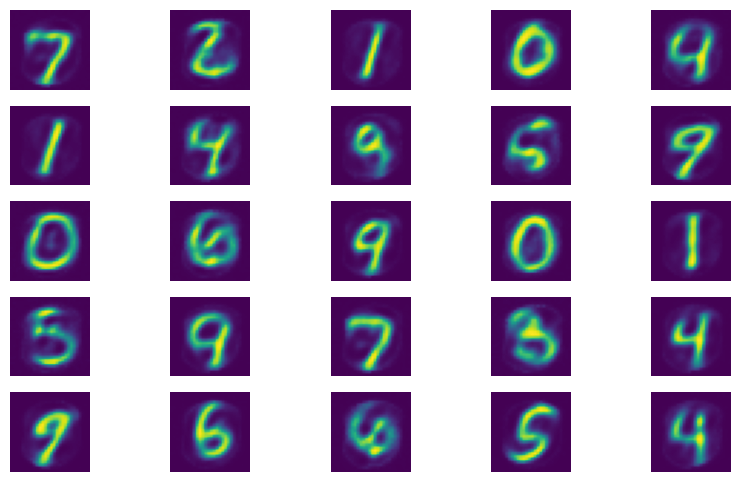

In [ ]:
nv_decoded_imgs=NV_autoencoder.predict(x_test)
plot_images(nv_decoded_imgs)

Plotting the Hidden units Activation (H) from the Naive Autoencoder.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


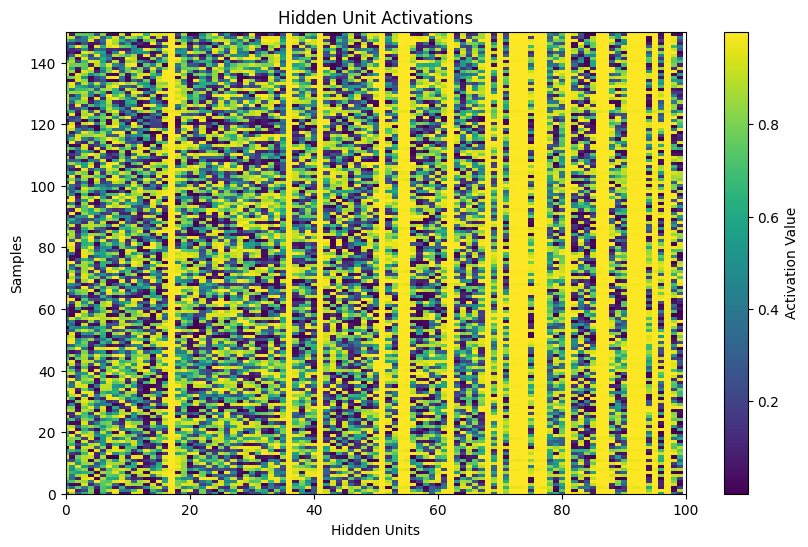

In [ ]:
#nv_activation= tf.keras.backend.function([NV_autoencoder.layers[0].input],[NV_autoencoder.layers[1].output])
nv_activation = tf.keras.Model(input_img,NV_encoder)
encoded_train_images=nv_activation.predict(x_train[:150])
encoded_test_images=nv_activation.predict(x_test[:150])
#nv_batch_activations=nv_activation([x_train[:150]])[0]
plot_activations(encoded_train_images,encoded_test_images)

Constructing and training a Classifier by using a inner layer of Navie Autoencoder and keeping the encoder weights frozen.

In [ ]:
def model_classifier(flag):
  input_img=tf.keras.layers.Input(shape=(784,))
  hidden1=NV_autoencoder.layers[1](input_img)
  output=tf.keras.layers.Dense(10,activation='softmax')(hidden1)
  classifier=tf.keras.models.Model(input_img,output)
  classifier.layers[1].trainable=flag
  sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
  classifier.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return classifier


In [ ]:
classifier_model=model_classifier(False)
nc=classifier_model.fit(x_train,y_train,epochs=200,batch_size=64,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7085 - loss: 1.1023 - val_accuracy: 0.8726 - val_loss: 0.4763
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8667 - loss: 0.4793 - val_accuracy: 0.8800 - val_loss: 0.4201
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.4267 - val_accuracy: 0.8867 - val_loss: 0.3875
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.4006 - val_accuracy: 0.8903 - val_loss: 0.3738
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3851 - val_accuracy: 0.8948 - val_loss: 0.3615
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8883 - loss: 0.3819 - val_accuracy: 0.8959 - val_loss: 0.3558
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.3717 - val_accuracy: 0.8981 - val_loss: 0.3505
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8905 - loss: 0.3751 - val_accu

Desinging and training the Sparse Auto Encoder.

using the KL_divergence equation from the PPT slides to add sparsity in the encoder.

In [ ]:
from tensorflow.keras import backend as K
import math as m
aplha=0.2
labda=0.1
def kl_divergence(alpha,alpha_h):
  kl=alpha*tf.math.log(alpha/alpha_h)+(1-alpha)*tf.math.log((1-alpha)/(1-alpha_h))
  return kl

def requaliration_endcoder(data):
  alpha_h=tf.reduce_mean(data,axis=0)
  return labda*kl_divergence(aplha,alpha_h)

Desining the sparser autoencoder architecture and trainig it.

In [ ]:
input_img=tf.keras.layers.Input(shape=(784,))
sparse_encoder=tf.keras.layers.Dense(100,activation='sigmoid',activity_regularizer=requaliration_endcoder)(input_img)
sparse_decoder=tf.keras.layers.Dense(784,activation='sigmoid')(sparse_encoder)
sparse_autoencoder=tf.keras.models.Model(input_img,sparse_decoder)
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
sparse_autoencoder.compile(optimizer=sgd,loss='mean_squared_error')
sparse_autoencoder.fit(x_train,x_train,epochs=1000,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3132 - val_loss: 0.2376
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2061 - val_loss: 0.2175
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1872 - val_loss: 0.2013
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1717 - val_loss: 0.1866
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1583 - val_loss: 0.1749
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1476 - val_loss: 0.1658
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1387 - val_loss: 0.1572
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1312 - val_loss: 0.1506
Epoch 9/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1247 - val_loss: 0.1449
Epoch 10/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1196 - val_loss: 0.1399
Epoch 11/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1147 - val_loss: 0.1353
Epoch 12/1000
938/938 ━━━━━━━━

Plotting the weights of sparse Autoencoder.

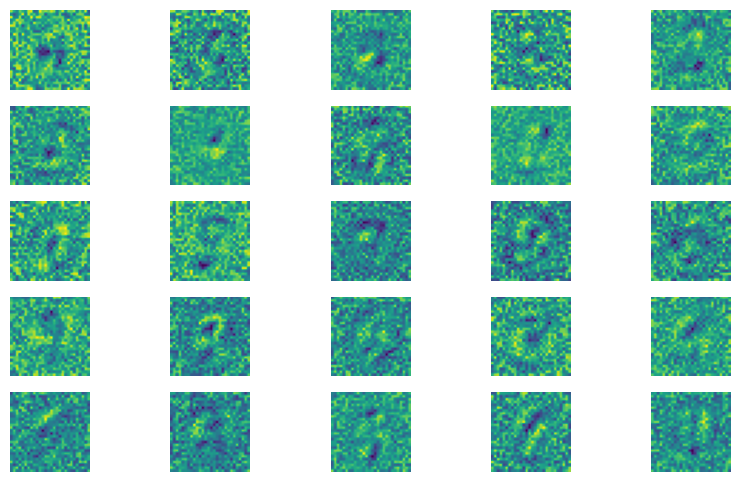

In [ ]:
#plot weights
sp_weights=sparse_autoencoder.layers[1].get_weights()[0]
sp_r_weights=sp_weights.T.reshape((100,28,28))
plotting_weights(sp_r_weights)

Displaying reconstructions from the sparese Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


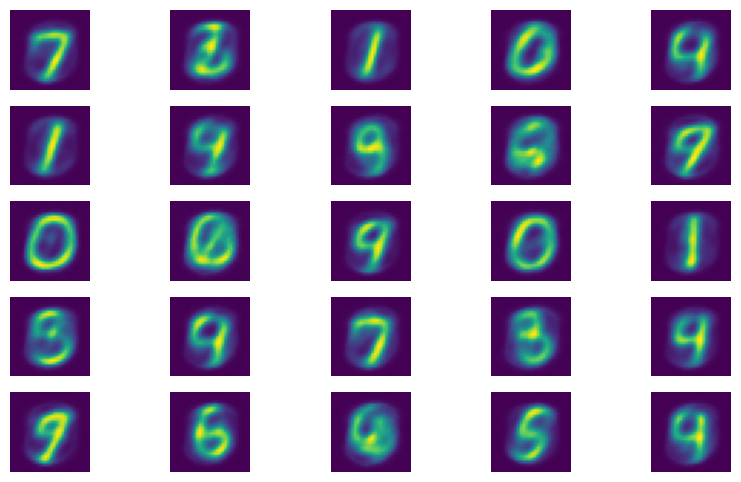

In [ ]:
#plot recostructions
sp_decoded_imgs=sparse_autoencoder.predict(x_test)
plot_images(sp_decoded_imgs)

Ploting the activaiton map (H) of the sparse Autoencoder.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


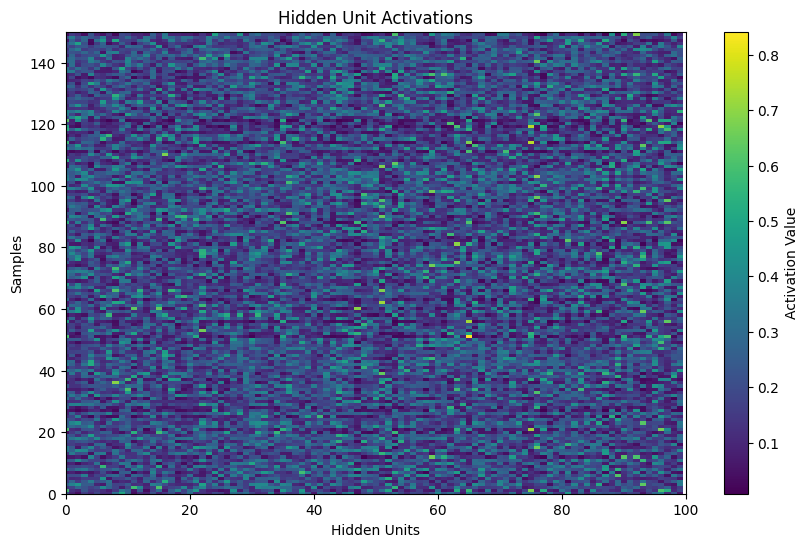

In [ ]:
#plot Activation
sp_activation = tf.keras.Model(input_img,sparse_encoder)
encoded_train_images=sp_activation.predict(x_train[:150])
encoded_test_images=sp_activation.predict(x_test[:150])
plot_activations(encoded_train_images,encoded_test_images)

constructing a classsifer using the inner layer of the sparser Autoencoder and keeping the encoder weights frozen.

In [ ]:
# creating SGD sparse classifier
def Sparser_classifier(flag):
  input_img=tf.keras.layers.Input(shape=(784,))
  hidden1=sparse_autoencoder.layers[1](input_img)
  output=tf.keras.layers.Dense(10,activation='softmax')(hidden1)
  classifier=tf.keras.models.Model(input_img,output)
  classifier.layers[1].trainable=flag
  sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
  classifier.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return classifier
sparse_classifier=Sparser_classifier(False)
sc=sparse_classifier.fit(x_train,y_train,epochs=200,batch_size=64,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7248 - loss: 1.1283 - val_accuracy: 0.8490 - val_loss: 0.5805
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8433 - loss: 0.5532 - val_accuracy: 0.8628 - val_loss: 0.5044
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.4898 - val_accuracy: 0.8696 - val_loss: 0.4727
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8670 - loss: 0.4565 - val_accuracy: 0.8747 - val_loss: 0.4516
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8698 - loss: 0.4418 - val_accuracy: 0.8788 - val_loss: 0.4370
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8764 - loss: 0.4278 - val_accuracy: 0.8814 - val_loss: 0.4239
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8791 - loss: 0.4151 - val_accuracy: 0.8854 - val_loss: 0.4151
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8822 - loss: 0.4072 - val_accu

Comparing the Test Accuracy of 3 different classifers designed above.

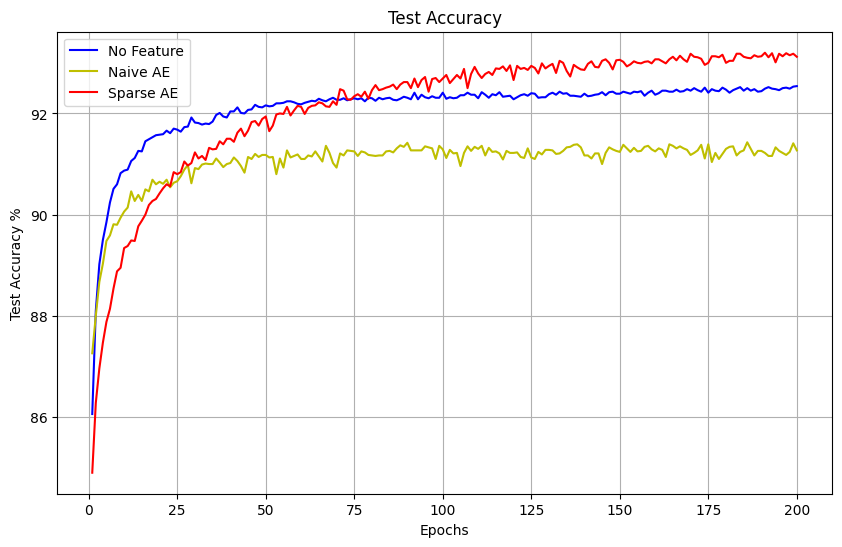

In [ ]:
#plotting_training_curves
nae_history_dict = nc.history
sae_history_dict = sc.history
nae_test_accuracy = [accuracy * 100 for accuracy in nae_history_dict['val_accuracy']]
sae_test_accuracy = [accuracy * 100 for accuracy in sae_history_dict['val_accuracy']]

epochs = range(1, len(nae_test_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_accuracy, 'b', label='No Feature')
plt.plot(epochs, nae_test_accuracy, 'y', label='Naive AE')
plt.plot(epochs, sae_test_accuracy, 'r', label='Sparse AE')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.grid(True)
plt.show()


From the Graph we can see that the sparse Autoecoder is perfroming better than the other 2.

Designing and training a shallow Neural Network and comparing the performance with previously created networks.

In [ ]:
def model_NN():
  input=tf.keras.layers.Input(shape=(784,))
  hidden1=tf.keras.layers.Dense(128,activation='sigmoid')(input)
  output=tf.keras.layers.Dense(10,activation='softmax')(hidden1)

  model_nn_classifier=tf.keras.models.Model(input,output)
  sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
  model_nn_classifier.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model_nn_classifier

In [ ]:
model_nn_classifier=model_NN()
nnc=model_nn_classifier.fit(x_train,y_train,epochs=200,batch_size=64,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7237 - loss: 1.1129 - val_accuracy: 0.8987 - val_loss: 0.3742
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8966 - loss: 0.3696 - val_accuracy: 0.9131 - val_loss: 0.3094
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9079 - loss: 0.3181 - val_accuracy: 0.9163 - val_loss: 0.2860
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9157 - loss: 0.2901 - val_accuracy: 0.9228 - val_loss: 0.2656
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9230 - loss: 0.2612 - val_accuracy: 0.9295 - val_loss: 0.2470
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9276 - loss: 0.2488 - val_accuracy: 0.9304 - val_loss: 0.2365
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9333 - loss: 0.2353 - val_accuracy: 0.9365 - val_loss: 0.2209
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9361 - loss: 0.2209 - val_accu

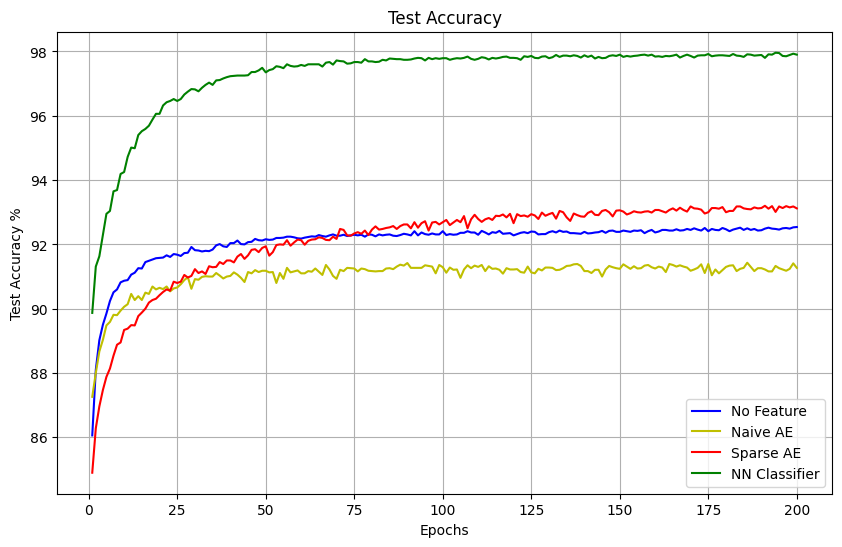

In [ ]:
#plotting_training_curves
nae_history_dict = nc.history
sae_history_dict = sc.history
nnc_history_dict = nnc.history
nae_test_accuracy = [accuracy * 100 for accuracy in nae_history_dict['val_accuracy']]
sae_test_accuracy = [accuracy * 100 for accuracy in sae_history_dict['val_accuracy']]
nnc_test_accuracy = [accuracy * 100 for accuracy in nnc_history_dict['val_accuracy']]
epochs = range(1, len(nae_test_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_accuracy, 'b', label='No Feature')
plt.plot(epochs, nae_test_accuracy, 'y', label='Naive AE')
plt.plot(epochs, sae_test_accuracy, 'r', label='Sparse AE')
plt.plot(epochs, nnc_test_accuracy, 'g', label='NN Classifier')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.grid(True)
plt.show()


Training the Naive and Sparse classifiers by activating backpropogation and comparing its performance with other networks.

In [ ]:
classifier_model_bp=model_classifier(True)
nc_bp=classifier_model_bp.fit(x_train,y_train,epochs=200,batch_size=64,shuffle=True,validation_data=(x_test,y_test))
sparse_classifier_bp=Sparser_classifier(True)
sc_bp=sparse_classifier_bp.fit(x_train,y_train,epochs=200,batch_size=64,shuffle=True,validation_data=(x_test,y_test))


Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7264 - loss: 1.0156 - val_accuracy: 0.8954 - val_loss: 0.3823
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8940 - loss: 0.3791 - val_accuracy: 0.9127 - val_loss: 0.3129
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9105 - loss: 0.3134 - val_accuracy: 0.9231 - val_loss: 0.2729
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9218 - loss: 0.2720 - val_accuracy: 0.9319 - val_loss: 0.2458
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9289 - loss: 0.2481 - val_accuracy: 0.9363 - val_loss: 0.2267
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9349 - loss: 0.2279 - val_accuracy: 0.9416 - val_loss: 0.2097
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9410 - loss: 0.2080 - val_accuracy: 0.9438 - val_loss: 0.1979
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9454 - loss: 0.1939 - val_accu

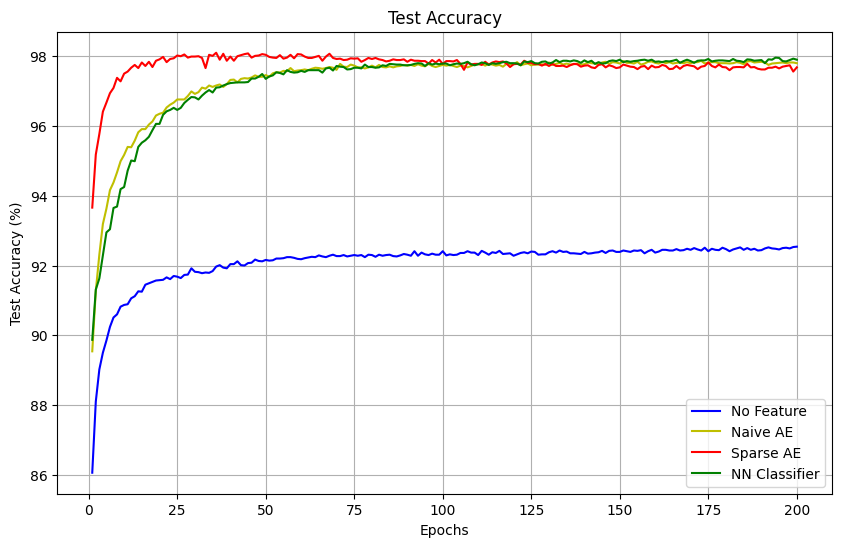

In [ ]:
nae_history_dict_bp = nc_bp.history
sae_history_dict_bp = sc_bp.history
nnc_history_dict = nnc.history
nae_test_accuracy = [accuracy * 100 for accuracy in nae_history_dict_bp['val_accuracy']]
sae_test_accuracy = [accuracy * 100 for accuracy in sae_history_dict_bp['val_accuracy']]
nnc_test_accuracy = [accuracy * 100 for accuracy in nnc_history_dict['val_accuracy']]
epochs = range(1, len(nae_test_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_accuracy, 'b', label='No Feature')
plt.plot(epochs, nae_test_accuracy, 'y', label='Naive AE ')
plt.plot(epochs, sae_test_accuracy, 'r', label='Sparse AE')
plt.plot(epochs, nnc_test_accuracy, 'g', label='NN Classifier')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

Creating a network with 5 hidden fullyconnected layers with 512 neurons each and test the  models performace by alterning the weight initializers and Activation functions. We do this enabling Batch Normalization and without Batch Normailization and compare the perfromance.

In [ ]:
#inital Parmeters
input_size = 784  # Assuming MNIST with 28x28 input images (flattened)
output_size = 10  # 10 classes (digits 0-9)
hidden_units = 512
epochs = 50
batch_size = 64
learning_rate = 0.01

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=output_size)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=output_size)

In [ ]:
def create_model(activation, initializer, use_batch_norm=False):
    model = tf.keras.Sequential()

    for k in range(5):
        model.add(tf.keras.layers.Dense(hidden_units, kernel_initializer=initializer))
        if use_batch_norm:
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))

    model.add(tf.keras.layers.Dense(output_size, activation='softmax'))

    return model

In [ ]:
def train_and_evaluate(activation, initializer, use_batch_norm=False):
    model = create_model(activation, initializer, use_batch_norm)
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=0)

    return history

# Initialize models with different configurations
configurations = [
    ('sigmoid', tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01), False, 'Logestic:Normal'),  # Sigmoid + Normal
    ('sigmoid', tf.keras.initializers.GlorotUniform(), False,'Logestic:Xavier'),  # sigmoid+ Xavier
    ('relu', tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01), False,'ReLU:Normal'),  # relu + Normal
    ('relu', tf.keras.initializers.GlorotUniform(), False,'ReLU:Xavier'),  # ReLU + Xavier
    ('relu', tf.keras.initializers.HeUniform(), False,'ReLU:He'),  # ReLU + He
]

# Train models without Batch Normalization
results_no_bn = {}
for (activation, initializer, use_batch_norm,name) in configurations:
    print(f'Training model with {name} (No BN)')
    history = train_and_evaluate(activation, initializer, use_batch_norm)
    results_no_bn[f'{name}'] = history.history['val_accuracy']

# Train models with Batch Normalization
results_bn = {}
for (activation, initializer, _,name) in configurations:
    print(f'Training model with {name} (With BN)')
    history = train_and_evaluate(activation, initializer, True)
    results_bn[f'{name}'] = history.history['val_accuracy']

Training model with Logestic:Normal (No BN)
Training model with Logestic:Xavier (No BN)
Training model with ReLU:Normal (No BN)
Training model with ReLU:Xavier (No BN)
Training model with ReLU:He (No BN)
Training model with Logestic:Normal (With BN)
Training model with Logestic:Xavier (With BN)
Training model with ReLU:Normal (With BN)
Training model with ReLU:Xavier (With BN)
Training model with ReLU:He (With BN)


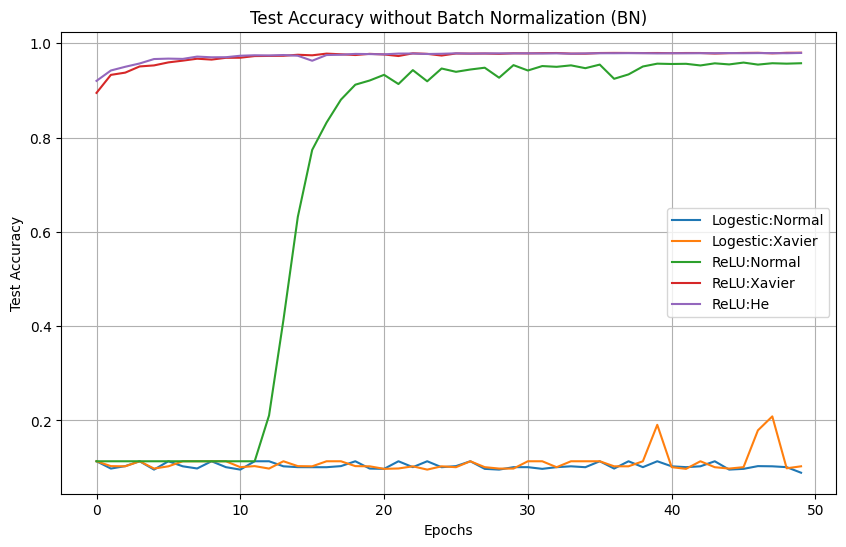

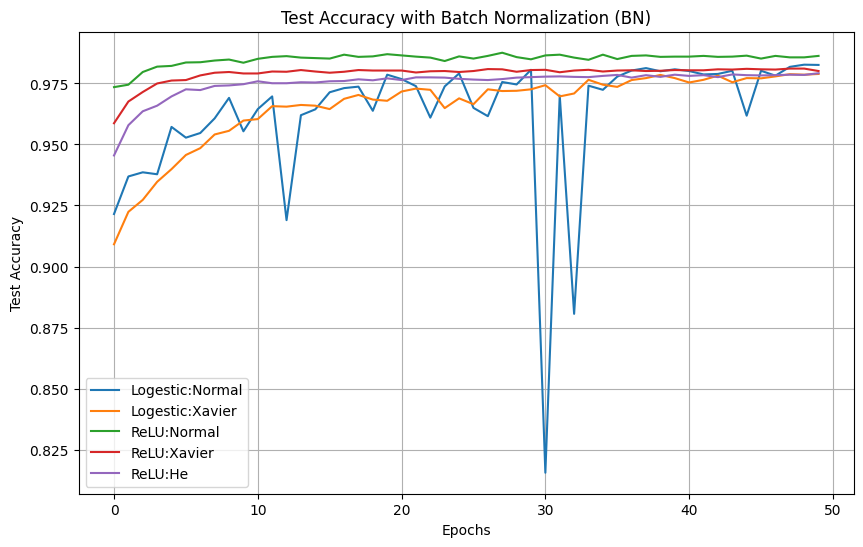

In [ ]:
def plot_results(results, title):
    plt.figure(figsize=(10, 6))
    for key, val_acc in results.items():
        plt.plot(range(epochs), val_acc, label=key)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for No Batch Normalization
plot_results(results_no_bn, "Test Accuracy without Batch Normalization (BN)")

# Plot results for With Batch Normalization
plot_results(results_bn, "Test Accuracy with Batch Normalization (BN)")

From the Grpahs we can conclude using batch normalization helps the model to converge to the optimum quickly.